In [4]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from datetime import datetime, timedelta
import pandas as pd

# Read data from Ken's netCDF file
dataset = nc.Dataset('GIS.nc')
discharge = dataset.variables['discharge'][:]
time = dataset.variables['time'][:]

# Convert decimal years to datetime
epoch_start = datetime(1986, 4, 15)
time_in_days = time
GIS_time = np.array([epoch_start + timedelta(days=float(t)) for t in time_in_days])

# 2024 points: 2023 September 1 through 2024 August 31
start_date = datetime(2023, 9, 1)
end_date = datetime(2024, 8, 31)
t24 = (GIS_time >= start_date) & (GIS_time <= end_date)


# Uniform year
uniyr = np.arange(0,365,3.65)   # 365 is divisible by 36.5
unidis = np.zeros((100,30));    # months (10 not 12) by years


nn = 0
for yr in range(1991, 2021):  # I guess it should end in 2020 though?
    nn += 1
    
    # This year actually starts on September 1 of the previous year
    t0 = datetime(yr - 1, 9, 1)

    # Find the eligible dates
    tt = (GIS_time >= t0) & (GIS_time <= datetime(yr, 8, 31))
    tt_indices = np.where(tt)[0]
    
    # Put the data onto a uniform year from day 0 to day 364 for averaging later
    unidis[:,yr-1991] = np.interp(uniyr*31557600/365, [date.timestamp() - t0.timestamp() for date in GIS_time[tt]], discharge[tt])

srt = np.argsort(unidis[0,:])
print(f'order of discharge, small to large: {[srt+1991]}')

# Average discharge over the climatological range
avgdis = np.nanmean(unidis, axis=None)
stddis = np.nanstd(unidis, axis=None)
print('average discharge over all days of all yrs 1991-2020: ',avgdis)


# Now analyze the 2024 data
# This year actually starts on September 1 of the previous year
t0 = datetime(2023, 9, 1)

# Find the eligible dates for 2024 mass balance year
tt = (GIS_time >= t0) & (GIS_time <= datetime(2024, 8, 31))
tt_indices = np.where(tt)[-1]

# Calculate the mean over the 2024 mass balance year
mn24 = np.nanmean(np.interp(uniyr*31557600/365, [date.timestamp() - t0.timestamp() for date in GIS_time[tt]], discharge[tt]))

# Print the trend and comparison
print(f'In the 2024 mass balance year through {GIS_time[-1]}, the mean discharge was {mn24:.2f} Gt/yr compared to 1991-2020 mean of {avgdis:.2f} +/- {stddis:.2f} Gt/yr')


order of discharge, small to large: [array([1999, 1998, 1996, 2002, 1997, 1995, 2001, 1991, 2000, 1992, 1994,
       1993, 2003, 2004, 2008, 2007, 2010, 2005, 2009, 2017, 2006, 2013,
       2011, 2015, 2012, 2020, 2016, 2019, 2018, 2014])]
average discharge over all days of all yrs 1991-2020:  457.6329921345251
In the 2024 mass balance year through 2024-08-13 00:00:00, the mean discharge was 487.38 Gt/yr compared to 1991-2020 mean of 457.63 +/- 27.32 Gt/yr


In [5]:
print(f'Average annual discharge: {avgdis:.2f} Gt/yr')
# How big is the mean peak in July?
print(f'Max mid-summer: {np.max(unidis):0.2f} Gt/yr is {(np.max(unidis)-avgdis)/avgdis*100:0.2f} percent larger than avg')
# How small is the wintertime baseline?
print(f'Min mid-winter: {np.min(unidis):0.2f} Gt/yr is {(avgdis-np.min(unidis))/avgdis*100:0.2f} percent smaller than avg')

Average annual discharge: 457.63 Gt/yr
Max mid-summer: 525.99 Gt/yr is 14.94 percent larger than avg
Min mid-winter: 409.01 Gt/yr is 10.63 percent smaller than avg


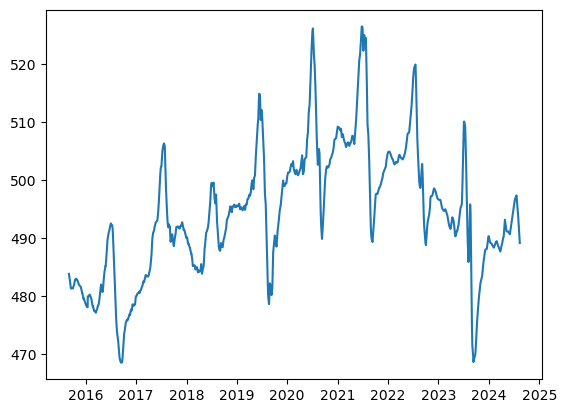

In [14]:
# Plot the full timeseries to find the years that are so much higher
plt.figure(10)
plt.clf()

start_date = datetime(2015, 9, 1)
end_date = datetime(2024, 8, 31)
tplot = (GIS_time >= start_date) & (GIS_time <= end_date)

plt.plot(GIS_time[tplot], discharge[tplot])


# Save figure
# plt.savefig('Discharge_2015-2024.png')

plt.show()

Average discharge over all days of all yrs 1991-2020:  457.6329921345251


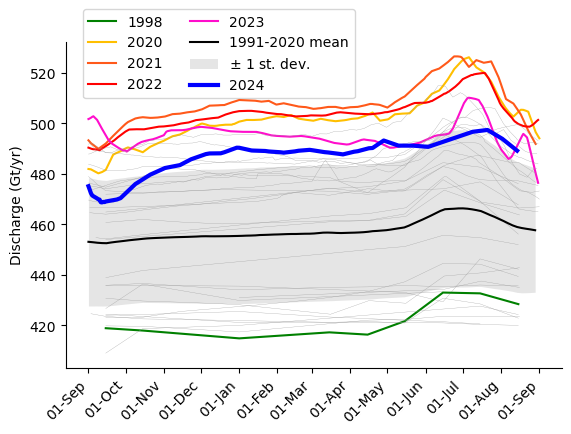

In the 2024 mass balance year through 2024-08-13 00:00:00, the mean discharge was 487.38 Gt/yr compared to 1991-2020 mean of 457.63 +/- 27.32 Gt/yr


In [15]:
# Same as above but with the spaghettis too
# Produce the final figure

import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from datetime import datetime, timedelta
import pandas as pd

# Read data from Ken's netCDF file
dataset = nc.Dataset('GIS.nc')
discharge = dataset.variables['discharge'][:]
time = dataset.variables['time'][:]

# Convert decimal years to datetime
epoch_start = datetime(1986, 4, 15)
time_in_days = time
GIS_time = np.array([epoch_start + timedelta(days=float(t)) for t in time_in_days])
#print('GIS_time: ', GIS_time[0:5])

# 2024 points: 2023 September 1 through 2024 August 31
start_date = datetime(2023, 9, 1)
end_date = datetime(2024, 8, 31)
t24 = (GIS_time >= start_date) & (GIS_time <= end_date)


# Start the figure
plt.figure(4)
plt.clf()

keyyrs = [1998, 2020, 2021, 2022, 2023]
yearcolors = ['green', [1, 0.75, 0], [1, 0.35, 0.1], [1, 0, 0], [1, 0.05, 0.8]]

nn = 0
for yr in range(1991, 2023+1):
    
    # This year actually starts on September 1 of the previous year
    t0 = datetime(yr - 1, 9, 1)

    # Find the eligible dates
    tt = (GIS_time >= t0) & (GIS_time <= datetime(yr, 8, 31))
    tt_indices = np.where(tt)[0]

    # If this year is one of the key years, then plot its discharge in color
    if np.isin(yr,keyyrs):
        nn += 1
        plt.plot([date.timestamp() - t0.timestamp() for date in GIS_time[tt]], discharge[tt], zorder=nn+3, label=f'{yr}', color=yearcolors[nn-1])
        #print(f'plotting {yr} with zorder {nn+1}')
    # If not, plot its discharge in gray with tiny linewidth
    elif yr <= 2020:
        plt.plot([date.timestamp() - t0.timestamp() for date in GIS_time[tt]], discharge[tt], color=[0.6, 0.6, 0.6], linewidth=0.2, zorder=yr-1990, label='_nolegend_')#label=f'{yr}')
        #print(f'plotting {yr} in gray with zorder {yr-1990}')



xtick = np.cumsum([0, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31]) * 86400    # plot units are in seconds
plt.xticks(xtick, ['01-Sep', '01-Oct', '01-Nov', '01-Dec', '01-Jan', '01-Feb', '01-Mar', '01-Apr', '01-May', '01-Jun', '01-Jul', '01-Aug', '01-Sep'])
plt.gcf().autofmt_xdate()     # Give the date labels an appropriate angle



# Step through again to find the climatology (1991-2020 only)
nn = 0
for yr in range(1991, 2020+1):  # This range ends in 2020 
    nn += 1
    
    # This year actually starts on September 1 of the previous year
    t0 = datetime(yr - 1, 9, 1)

    # Find the eligible dates
    tt = (GIS_time >= t0) & (GIS_time <= datetime(yr, 8, 31))
    tt_indices = np.where(tt)[0]

    # Put the data onto a uniform year from day 0 to day 364 for averaging later
    unidis[:,yr-1991] = np.interp(uniyr*31557600/365, [date.timestamp() - t0.timestamp() for date in GIS_time[tt]], discharge[tt])
  

# Average discharge over the climatological range
avgdis = np.nanmean(unidis, axis=None)
stddis = np.nanstd(unidis, axis=None)
print('Average discharge over all days of all yrs 1991-2020: ',avgdis)


# Plot the average +/- std discharge across a climatological year
avg_discharge = np.nanmean(unidis, axis=1)
plt.plot(uniyr*31557600/365,np.nanmean(unidis, axis=1), color='black', zorder = 31, label='1991-2020 mean')

# Plot +/- 1 standard deviation as a yellow shaded area
std_discharge = np.nanstd(unidis, axis=1)
plt.fill_between(np.arange(0,31557600,31557600/100), avg_discharge - std_discharge, avg_discharge + std_discharge, color='gray', alpha=0.2, linewidth=0, zorder=0, label='$\pm$ 1 st. dev.')


# Now analyze the 2024 data
# This year actually starts on September 1 of the previous year
t0 = datetime(2023, 9, 1)

# Find the eligible dates for 2024 mass balance year
tt = (GIS_time >= t0) & (GIS_time <= datetime(2024, 8, 31))
tt_indices = np.where(tt)[-1]

# Calculate the mean over the 2024 mass balance year
mn24 = np.nanmean(np.interp(uniyr*31557600/365, [date.timestamp() - t0.timestamp() for date in GIS_time[tt]], discharge[tt]))

# Add 2024 data to plot as the topmost layer
plt.plot([date.timestamp() - t0.timestamp() for date in GIS_time[tt]], discharge[tt], '-b', linewidth=3, markersize=10, markerfacecolor='k', label='2024', zorder=99)
plt.ylabel('Discharge (Gt/yr)')

# Some plot fine tuning
left, right = plt.xlim()
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(0.02, 1.12), loc='upper left', ncol=2)


# Nuke part of the box
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Save figure
plt.savefig('Discharge_1991-2020_2024_spaghetti.png')
plt.savefig('Discharge_1991-2020_2024_spaghetti.svg')
plt.show()

# Print the trend and comparison
print(f'In the 2024 mass balance year through {GIS_time[-1]}, the mean discharge was {mn24:.2f} Gt/yr compared to 1991-2020 mean of {avgdis:.2f} +/- {stddis:.2f} Gt/yr')
